## Classification with Decision Trees

In [140]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [128]:
# Import and display csv
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [129]:
# Display Summary Statistics
# There are no missing data points based on the counts 
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [133]:
# the data set appears to be clean
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [99]:
# Assign the Target variable. We want to predict the 'quality' variable Y
Y = wine_data.quality

# X features used to predict Y
X = wine_data.drop('quality', axis = 1)

# Verify they have the same dimensions (number of rows)
print(Y.shape, X.shape) 

(1599,) (1599, 11)


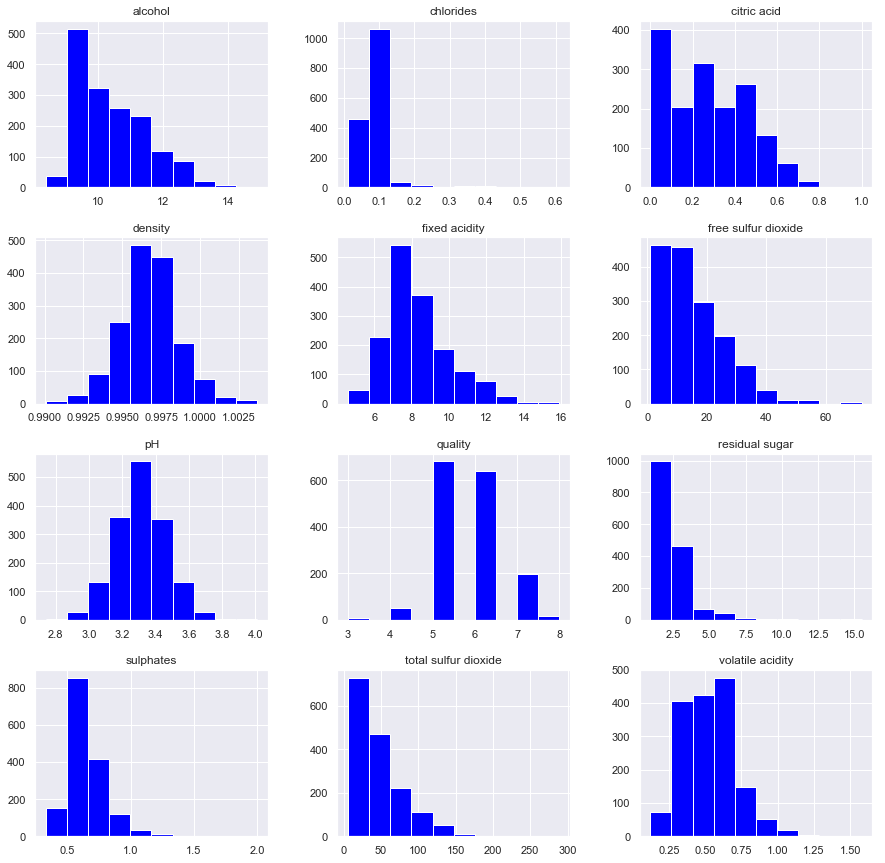

In [158]:
# Generate histograms of each feature to visualize the data and observe the distribution of the various features

sns.set()
wine_data.hist(figsize=(15,15), color='blue')
plt.show()

In [101]:
# Check to see the correlations, if any, between the different features:
# Our target is quality
# Alcohol has the strongest correlation with quality
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


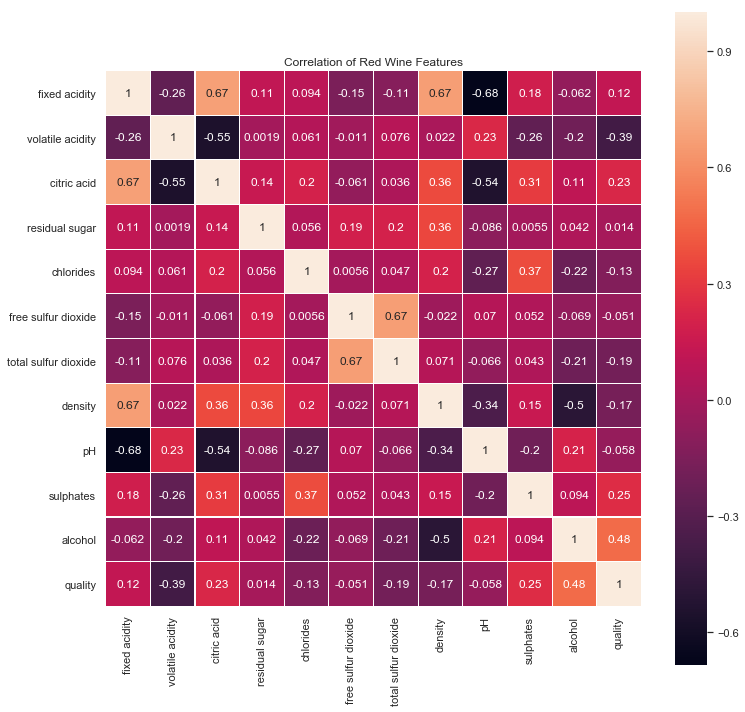

In [102]:
# Alternatively, visualize any correlations present
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Red Wine Features', y=1, size=12)
sns.heatmap(wine_data.astype(float).corr(),linewidths=0.1,vmax=1, square=True, linecolor='white', annot=True)
plt.show()

In [181]:
type(Good_wine)

pandas.core.series.Series

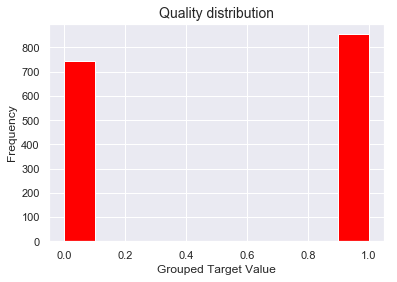

In [183]:
# Now create the different groups
# All Wines with a quality score above 5 are considered 'good'
Good_wine = (Y >5).astype(int)

# plot histogram of the 'good' vs 'bad' wine distribution
wine_hist = Good_wine.plot.hist(color='red')
wine_hist.set_title('Quality distribution', fontsize=14)
wine_hist.set_xlabel('Grouped Target Value')
plt.show()

In [170]:
# Construct a Decision Tree model and validate that model using cross validation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Good_wine, test_size=0.2, random_state=5)

# Display the dimensions of your Training and Testing Data
print('X Train | X Test:')
print(X_train.shape, X_test.shape)
print('-'*50)
print('Y Train | Y Test:')
print(y_train.shape, y_test.shape)

X Train | X Test:
(1279, 11) (320, 11)
--------------------------------------------------
Y Train | Y Test:
(1279,) (320,)


In [171]:
# Create the Random Forest Classifier
classifier = RandomForestClassifier(random_state=5)
classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [172]:
# Compute k-fold cross validation on training dataset and see mean accuracy score
scores = cross_val_score(classifier,X_train, y_train, cv=10, scoring='accuracy')
print(f'Training Data Accuracy Scores : {scores}')
print('-'*50)
print(f'Training Data Mean Accuracy Score : {scores.mean()}')

Training Data Accuracy Scores : [0.74418605 0.7751938  0.78294574 0.88372093 0.7421875  0.81889764
 0.78740157 0.79527559 0.77165354 0.82677165]
--------------------------------------------------
Training Data Mean Accuracy Score : 0.7928234011627907


In [173]:
# Fit the model to your training data and put your model to the test
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [182]:
# Display scores
print(f'Accuracy Score : {accuracy_score(y_test, prediction)}')
print('-'*50)
print(f'Log Loss : {log_loss(y_test, prediction)}')

Accuracy Score : 0.825
--------------------------------------------------
Log Loss : 6.044353335142543


In [178]:
# describe the performance of a classifier using a confusion matrix table: 'TN' 'FN', 'FP' 'TP'
confusion_matrix(y_test, prediction)

array([[132,  27],
       [ 29, 132]])